In [0]:
!pip install -U -q keras

In [0]:
!pip install kaggle

  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /content/.cache/pip/wheels/2a/cc/c6/e4c872c053261660031b4a3e35ac958725b284c6fde9ff05c8
Successfully built kaggle


In [0]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!ls -lha .kaggle/competitions/dogs-vs-cats

total 815M
drwxr-xr-x 2 root root 4.0K Apr  4 11:08 .
drwxr-xr-x 3 root root 4.0K Apr  4 11:08 ..
-rw-r--r-- 1 root root  87K Apr  4 11:08 sampleSubmission.csv
-rw-r--r-- 1 root root 272M Apr  4 11:08 test1.zip
-rw-r--r-- 1 root root 544M Apr  4 11:08 train.zip


In [0]:
!ls -lha train

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
!mv kaggle.json .kaggle/

In [0]:
!kaggle competitions download -c dogs-vs-cats

sampleSubmission.csv: Downloaded 87KB of 87KB
test1.zip: Downloaded 271MB of 271MB
train.zip: Downloaded 543MB of 543MB


In [0]:
!unzip .kaggle/competitions/dogs-vs-cats/train.zip

## INTRODUCTION TO CONVNETS

In [8]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# a convnet takes as input tensors of shape (image_height, image_width, image_channels)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [0]:
model.summary()
# the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


These classifiers process vectors, which are 1D, whereas the current output is a 3D tensor. First we have to flatten the 3D outputs to 1D, and then add a few Dense layers on top.

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

the (3, 3, 64) outputs are flattened into vectors of shape (576,) before going through two Dense layers

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11493376/11490434 [==============================] - 15s 1us/step
Epoch 1/5
60000/60000 [==============================] - 60s 996us/step - loss: 0.1673 - acc: 0.9469
Epoch 2/5
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0478 - acc: 0.9855
Epoch 3/5
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0340 - acc: 0.9893
Epoch 4/5
60000/60000 [==============================] - 58s 960us/step - loss: 0.0248 - acc: 0.9923
Epoch 5/5
60000/60000 [==============================] - 59s 992us/step - loss: 0.0200 - acc: 0.9940


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 3s 297us/step


In [0]:
test_acc

0.9919

the basic convnet has a test accuracy of 99.1%: we decreased the error rate by 68% (relative). Not bad!

In [0]:
test_loss

0.026008879459135097

This key characteristic gives convnets two interesting properties:
* The patterns they learn are translation invariant.
* They can learn spatial hierarchies of patterns

the term feature map means: every dimension in the depth axis is a feature (or filter), and the 2D tensor `output[:, :, n]` is the 2D spatial map of the response of this filter over the input

Convolutions are defined by two key parameters:
* Size of the patches extracted from the inputs
* Depth of the output feature map

### The max-pooling operation

In [0]:
model_no_max_pool = models.Sequential()
model_no_max_pool.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [0]:
model_no_max_pool.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


What’s wrong with this setup? Two things:
* It isn’t conducive to learning a spatial hierarchy of features
* The final feature map has 22 × 22 × 64 = 30,976 total coefficients per sample. This is huge.

## TRAINING A CONVNET FROM SCRATCH ON A SMALL DATASET

You can download the original dataset from www.kaggle.com/c/dogs-vs-cats/data 

In [14]:
import os, shutil

original_dataset_dir = 'train/'    

base_dir = 'cats_and_dogs_small/'                 
os.mkdir(base_dir)

# create train, test and validation folders
train_dir = os.path.join(base_dir, 'train')                                
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')                      
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')                                  
os.mkdir(test_dir)

# create cats and dogs folder into the train folder
train_cats_dir = os.path.join(train_dir, 'cats')                           
os.mkdir(train_cats_dir)                                                   

train_dogs_dir = os.path.join(train_dir, 'dogs')                           
os.mkdir(train_dogs_dir)                                                   

# create cats and dogs folder into the validation folder
validation_cats_dir = os.path.join(validation_dir, 'cats')                 
os.mkdir(validation_cats_dir)                                              

validation_dogs_dir = os.path.join(validation_dir, 'dogs')                 
os.mkdir(validation_dogs_dir)                                              

# create cats and dogs folder into the test folder
test_cats_dir = os.path.join(test_dir, 'cats')                             
os.mkdir(test_cats_dir)                                                    

test_dogs_dir = os.path.join(test_dir, 'dogs')                             
os.mkdir(test_dogs_dir)                                                    

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_cats_dir, fname)                              
    shutil.copyfile(src, dst)                                              

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(validation_cats_dir, fname)                         
    shutil.copyfile(src, dst)                                              

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_cats_dir, fname)                               
    shutil.copyfile(src, dst)                                              

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_dogs_dir, fname)                              
    shutil.copyfile(src, dst) 
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(validation_dogs_dir, fname)                         
    shutil.copyfile(src, dst)                                              

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_dogs_dir, fname)                               
    shutil.copyfile(src, dst)                       

In [0]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [0]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
from keras import optimizers

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)             
test_datagen = ImageDataGenerator(rescale=1./255)              

train_generator = train_datagen.flow_from_directory(
        train_dir,                                             
        target_size=(150, 150),                                 
        batch_size=20,
        class_mode='binary')                                   

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


the output of one of these generators: it yields batches of 150 × 150 RGB images (shape (20, 150, 150, 3)) and binary labels (shape (20,)). There are 20 samples in each batch (the batch size).

In [0]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 124s 1s/step - loss: 0.6849 - acc: 0.5425 - val_loss: 0.6674 - val_acc: 0.6060
Epoch 2/30
100/100 [==============================] - 110s 1s/step - loss: 0.6515 - acc: 0.6145 - val_loss: 0.6307 - val_acc: 0.6440
Epoch 3/30
100/100 [==============================] - 133s 1s/step - loss: 0.6043 - acc: 0.6745 - val_loss: 0.6037 - val_acc: 0.6790
Epoch 4/30
100/100 [==============================] - 130s 1s/step - loss: 0.5654 - acc: 0.7045 - val_loss: 0.5918 - val_acc: 0.6790
Epoch 5/30
100/100 [==============================] - 125s 1s/step - loss: 0.5351 - acc: 0.7275 - val_loss: 0.5927 - val_acc: 0.6740
Epoch 6/30
100/100 [==============================] - 131s 1s/step - loss: 0.5152 - acc: 0.7440 - val_loss: 0.6542 - val_acc: 0.6300
Epoch 7/30
100/100 [==============================] - 116s 1s/step - loss: 0.4895 - acc: 0.7590 - val_loss: 0.5688 - val_acc: 0.6880
Epoch 8/30
100/100 [==============================] - 110s 1s/step - 

In [0]:
model.save('cats_and_dogs_small_1.h5')

<Figure size 432x288 with 0 Axes>

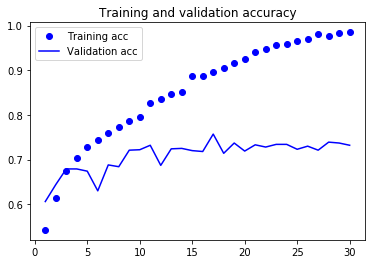

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

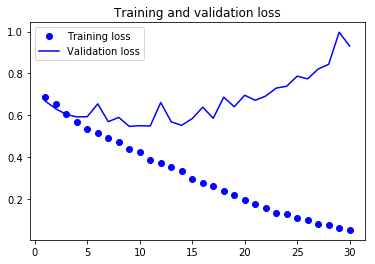

In [0]:
plt.clf()   

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Data augmentation

In [0]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

fnames  1000
x shape:  (1, 150, 150, 3)


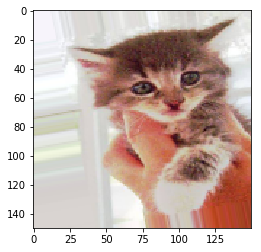

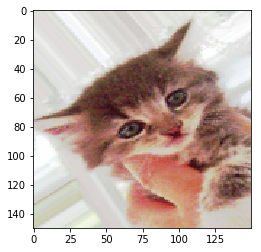

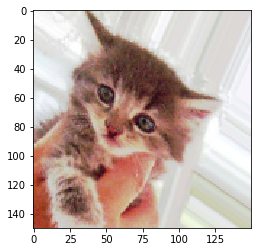

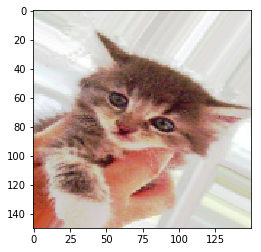

In [0]:
from keras.preprocessing import image                           

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
print("fnames ", len(fnames))

img_path = fnames[3]                                            

img = image.load_img(img_path, target_size=(150, 150))          

x = image.img_to_array(img)                                     
x = x.reshape((1,) + x.shape) 

print("x shape: ", x.shape)

i = 0                                                           
for batch in datagen.flow(x, batch_size=1):                     
    plt.figure(i)                                               
    imgplot = plt.imshow(image.array_to_img(batch[0]))          
    i += 1                                                      
    if i % 4 == 0:                                              
        break                                                   

plt.show()

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)               

train_generator = train_datagen.flow_from_directory(
        train_dir,                                              
        target_size=(150, 150),                                 
        batch_size=32,
        class_mode='binary')                                    

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 203s 2s/step - loss: 0.3812 - acc: 0.8206 - val_loss: 0.4778 - val_acc: 0.7989
Epoch 2/30
100/100 [==============================] - 188s 2s/step - loss: 0.3769 - acc: 0.8372 - val_loss: 0.6114 - val_acc: 0.7640
Epoch 3/30
100/100 [==============================] - 191s 2s/step - loss: 0.3650 - acc: 0.8362 - val_loss: 0.4212 - val_acc: 0.8293
Epoch 4/30
100/100 [==============================] - 191s 2s/step - loss: 0.3748 - acc: 0.8334 - val_loss: 0.4607 - val_acc: 0.7989
Epoch 5/30
100/100 [==============================] - 206s 2s/step - loss: 0.3662 - acc: 0.8353 - val_loss: 0.7360 - val_acc: 0.7373
Epoch 6/30
100/100 [==============================] - 227s 2s/step - loss: 0.3826 - acc: 0.8275 - val_loss: 0.4427 - val_acc: 0.8084
Epoch 7/30
100/100 [==============================] - 234s 2s/step - loss: 0.3695 - acc: 0.8300 - val_loss: 0.4815 - v

<Figure size 432x288 with 0 Axes>

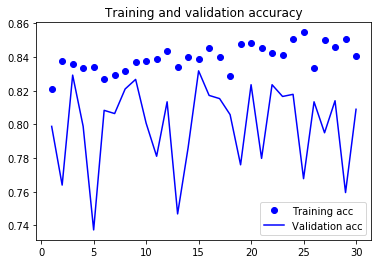

<Figure size 432x288 with 0 Axes>

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

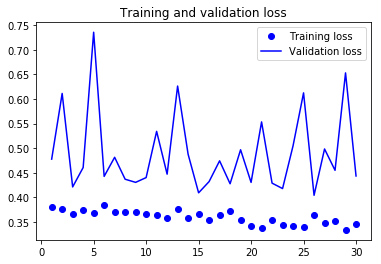

In [0]:
plt.clf()   

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model.save('cats_and_dogs_small_2.h5')

## USING A PRETRAINED CONVNET

There are available as part of keras.applications:

* Xception
* Inception V3
* ResNet50
* VGG16
* VGG19
* MobileNet


In [2]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

/Users/hakan/.pyenv/versions/3.6.4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

### Fast feature extraction without data augmentation

In [0]:
import os
import numpy as np

base_dir = 'cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break                                                           
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_features.shape

(2000, 4, 4, 512)

In [0]:
train_labels.shape

(2000,)

In [0]:
train_features[0].shape

(4, 4, 512)

In [0]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [0]:
train_features.shape

(2000, 8192)

In [0]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid', name="sigmoid_dense"))

In [0]:
model.summary()
# e.g. 14 * 512 * 256 = 2 097 408

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
sigmoid_dense (Dense)        (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.5966 - acc: 0.6780 - val_loss: 0.4375 - val_acc: 0.8380
Epoch 2/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4295 - acc: 0.8045 - val_loss: 0.3693 - val_acc: 0.8410
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3530 - acc: 0.8490 - val_loss: 0.3189 - val_acc: 0.8810
Epoch 4/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3065 - acc: 0.8720 - val_loss: 0.3026 - val_acc: 0.8780
Epoch 5/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2853 - acc: 0.8810 - val_loss: 0.2831 - val_acc: 0.8840
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2567 - acc: 0.9000 - val_loss: 0.2710 - val_acc: 0.8950
Epoch 7/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2429 - acc: 0.9100 - val_loss: 0.2666 - val_acc: 0.8900
Epoch 8/30
200

<Figure size 432x288 with 0 Axes>

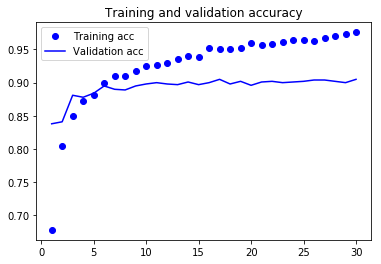

<Figure size 432x288 with 0 Axes>

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

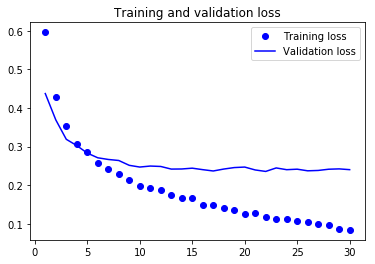

In [0]:
plt.clf() 
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Feature extraction without data augmentation

In [0]:
base_dir = 'cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break                                                           
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [0]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6031 - acc: 0.6700 - val_loss: 0.4408 - val_acc: 0.8430
Epoch 2/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.4305 - acc: 0.7990 - val_loss: 0.3631 - val_acc: 0.8640
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3538 - acc: 0.8450 - val_loss: 0.3257 - val_acc: 0.8740
Epoch 4/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3118 - acc: 0.8745 - val_loss: 0.3048 - val_acc: 0.8790
Epoch 5/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2871 - acc: 0.8830 - val_loss: 0.2893 - val_acc: 0.8840
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2747 - acc: 0.8895 - val_loss: 0.2761 - val_acc: 0.8900
Epoch 7/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2407 - acc: 0.9085 - val_loss: 0.2650 - val_acc: 0.8960
Epoch 8/30
200

Training is very fast, because you only have to deal with two Dense layers

<Figure size 432x288 with 0 Axes>

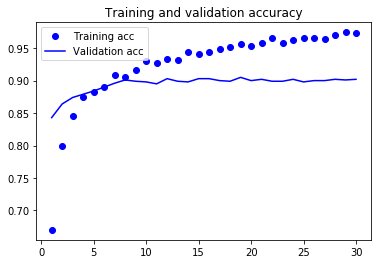

<Figure size 432x288 with 0 Axes>

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

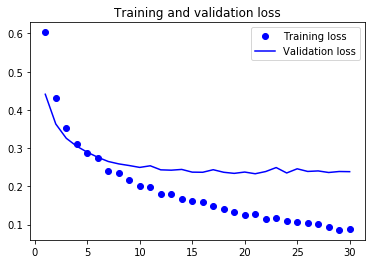

In [0]:
plt.clf() 
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

we reach a validation accuracy of about 90%—much better than you achieved in the previous section with the small model trained from scratch. But the plots also indicate that you’re overfitting almost from the start.

### Feature extraction with data augmentation

In [0]:
model = models.Sequential()
####
model.add(conv_base)
####
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


Before you compile and train the model, it’s very important to freeze the convolutional base. Freezing a layer or set of layers means preventing their weights from being updated during training. If you don’t do this, then the representations that were previously learned by the convolutional base will be modified during training.

In [0]:
print('This is the number of trainable weights '
         'before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
          'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


With this setup, only the weights from the two Dense layers that you added will be trained. That’s a total of four weight tensors: two per layer (the main weight matrix and the bias vector). 

In [0]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)                

train_generator = train_datagen.flow_from_directory(
        train_dir,                                               
        target_size=(150, 150),                                  
        batch_size=20,
        class_mode='binary')                                     

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 30s 300ms/step - loss: 0.4761 - acc: 0.7840 - val_loss: 0.3659 - val_acc: 0.8610
Epoch 2/30
100/100 [==============================] - 28s 284ms/step - loss: 0.4237 - acc: 0.8145 - val_loss: 0.3291 - val_acc: 0.8670
Epoch 3/30
100/100 [==============================] - 28s 282ms/step - loss: 0.4087 - acc: 0.8140 - val_loss: 0.3239 - val_acc: 0.8710
Epoch 4/30
 11/100 [==>...........................] - ETA: 14s - loss: 0.4062 - acc: 0.7909100/100 [==============================] - 28s 282ms/step - loss: 0.3885 - acc: 0.8235 - val_loss: 0.2943 - val_acc: 0.8830
Epoch 5/30
100/100 [==============================] - 28s 282ms/step - loss: 0.3664 - acc: 0.8490 - val_loss: 0.2838 - val_acc: 0.8810
Epoch 6/30
100/100 [==============================] - 28s 282ms/step - loss: 0.3584 - acc: 0.8375 - val_loss: 0.2784 - val_acc: 0.8800
Epoch 7/30
 74/100 [======

### Fine-tuning

In [4]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

You’ll fine-tune the last three convolutional layers, which means all layers up to block4_pool should be frozen, and the layers block5_conv1, block5_conv2, and block5_conv3 should be trainable.
in this situation, it’s a good strategy to fine-tune only the top two or three layers in the convolutional base.

In [5]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [9]:
model = models.Sequential()
####
model.add(conv_base)
####
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)                

train_generator = train_datagen.flow_from_directory(
        train_dir,                                               
        target_size=(150, 150),                                  
        batch_size=20,
        class_mode='binary')                                     

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=1,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/1
100/100 [==============================] - 698s 7s/step - loss: 0.5379 - acc: 0.7335 - val_loss: 0.3632 - val_acc: 0.8380


In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

import matplotlib.pyplot as plt
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

## VISUALIZING WHAT CONVNETS LEARN

### Visualizing intermediate activations

In [21]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [29]:
img_path = 'cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image                             
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
print(img_tensor.shape)

img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.                                               

print(img_tensor.shape)

(150, 150, 3)
(1, 150, 150, 3)


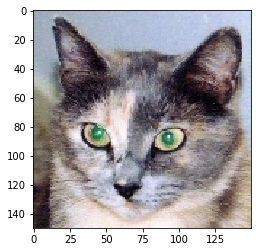

In [24]:
plt.imshow(img_tensor[0])
plt.show()

In [30]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]               
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 

In [31]:
activations = activation_model.predict(img_tensor)
#Returns a list of five Numpy arrays: one array per layer activation

In [34]:
first_convolution_layer_activation = activations[0]
print(first_convolution_layer_activation.shape)

(1, 148, 148, 32)


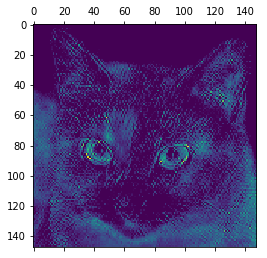

In [37]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

This channel appears to encode a diagonal edge detector. Let’s try the seventh channel

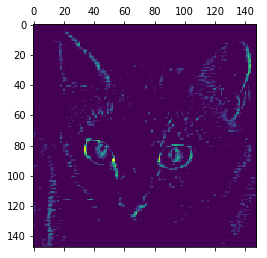

In [38]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

This one looks like a “bright green dot” detector, useful to encode cat eyes.

/Users/hakan/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


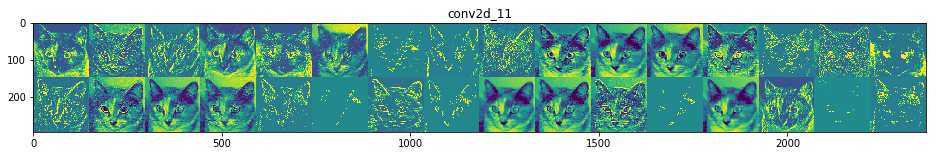

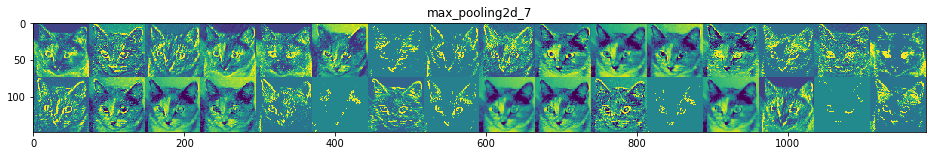

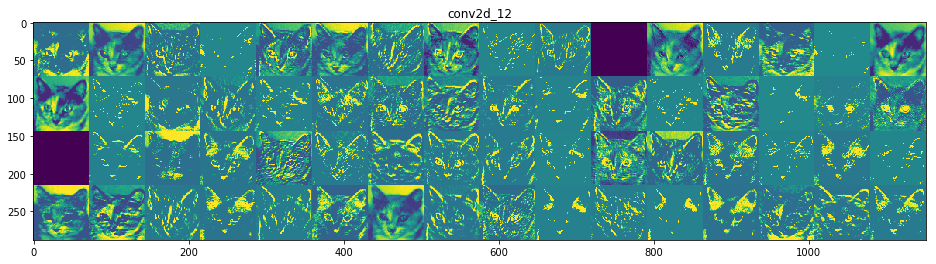

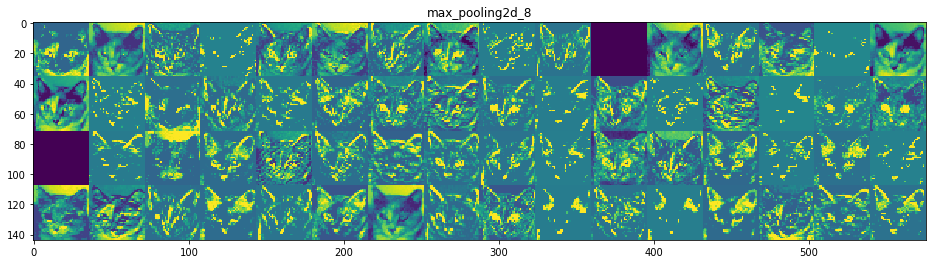

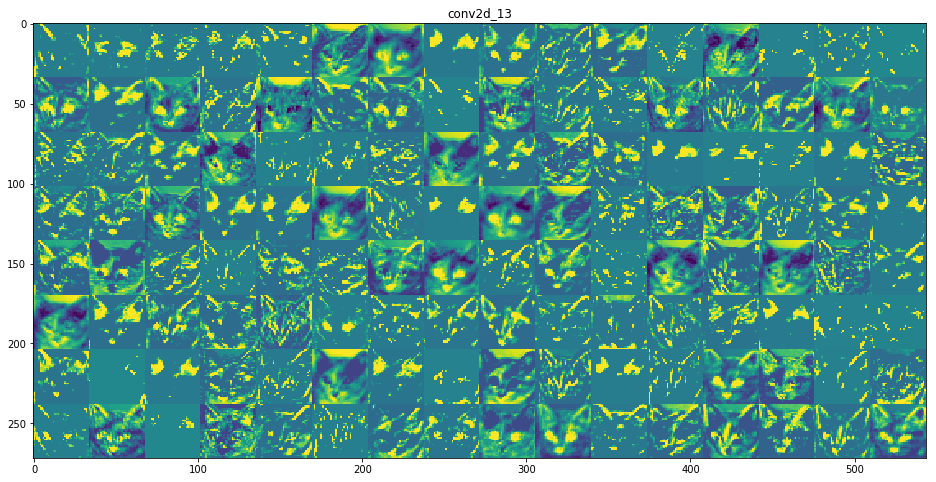

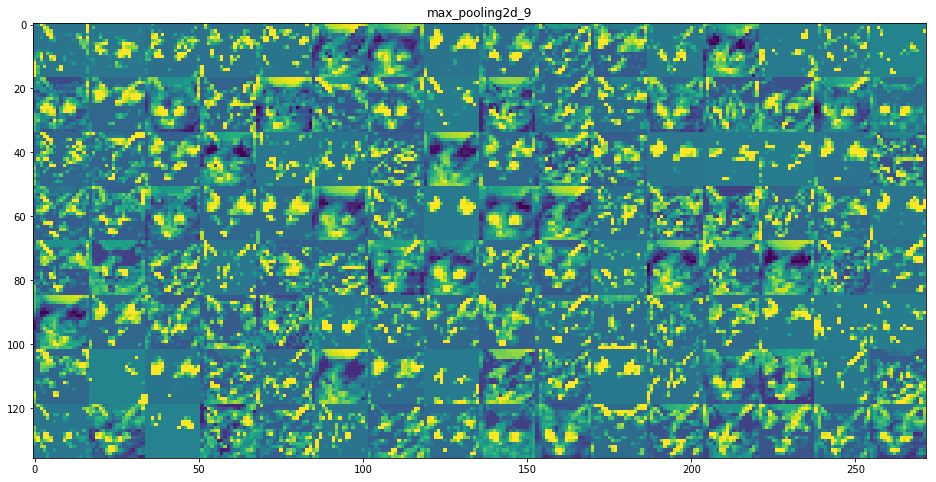

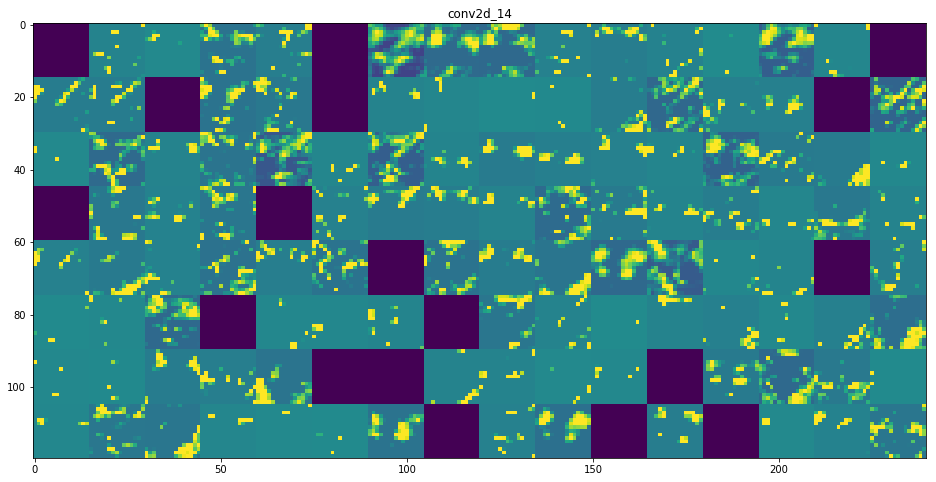

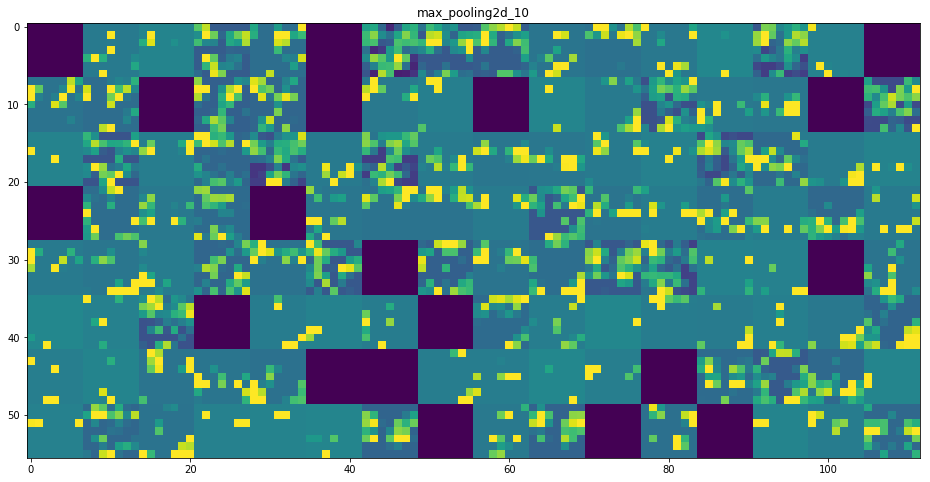

In [39]:
layer_names = []                                                          
for layer in model.layers[:8]:                                            
    layer_names.append(layer.name)                                        

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):        
    n_features = layer_activation.shape[-1]                               

    size = layer_activation.shape[1]                                      

    n_cols = n_features // images_per_row                                 
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):                                             
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            channel_image -= channel_image.mean()                         
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,                   
                         row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

### Visualizing convnet filters

In [40]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [41]:
grads = K.gradients(loss, model.input)[0] 

In [42]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [43]:
iterate = K.function([model.input], [loss, grads])

import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [44]:
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.      

step = 1.                                                       
for i in range(40):                                                  
    loss_value, grads_value = iterate([input_img_data])    
    # Computes the loss value and gradient value

    input_img_data += grads_value * step        

In [45]:
def deprocess_image(x):
    x -= x.mean()                                
    x /= (x.std() + 1e-5)                        
    x *= 0.1                                     

    x += 0.5                                     
    x = np.clip(x, 0, 1)                         

    x *= 255                                     
    x = np.clip(x, 0, 255).astype('uint8')       
    return x  

In [47]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output                     
    loss = K.mean(layer_output[:, :, :, filter_index])                    

    grads = K.gradients(loss, model.input)[0]                             

    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)                     

    iterate = K.function([model.input], [loss, grads])                    

    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.     

    step = 1.                                                             
    for i in range(40):                                                   
        loss_value, grads_value = iterate([input_img_data])               
        input_img_data += grads_value * step                              

    img = input_img_data[0]
    return deprocess_image(img)

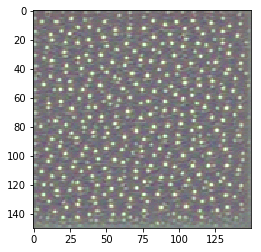

In [48]:
plt.imshow(generate_pattern('block3_conv1', 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


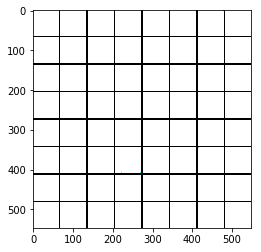

In [50]:
layer_name = 'block1_conv1'
size = 64
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))      

for i in range(8):                                                         
    for j in range(8):                                                     
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)  

        horizontal_start = i * size + i * margin                           
        horizontal_end = horizontal_start + size                           
        vertical_start = j * size + j * margin                             
        vertical_end = vertical_start + size                               
        results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img              

                                             
plt.imshow(results)         

### Visualizing heatmaps of class activation

In [51]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet') 

553467904/553467096 [==============================] - 347s 1us/step


In [53]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = 'images/creative_commons_elephant.jpg'     

img = image.load_img(img_path, target_size=(224, 224))                  

x = image.img_to_array(img)                                              
# float32 Numpy array of shape (224, 224, 3)

x = np.expand_dims(x, axis=0)      
#Adds a dimension to transform the array into a batch of size (1, 224, 224, 3)

x = preprocess_input(x)      
# Preprocesses the batch (this does channel-wise color normalization)

In [54]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 7us/step
Predicted: [('n02504458', 'African_elephant', 0.7521909), ('n01871265', 'tusker', 0.22554731), ('n02504013', 'Indian_elephant', 0.02216552)]


The top three classes predicted for this image are as follows:

* African elephant (with 75% probability)
* Tusker (with 2% probability)
* Indian elephant (with 0.02% probability)

The entry in the prediction vector that was maximally activated is the one corresponding to the “African elephant” class, at index 386

In [55]:
np.argmax(preds[0])

386

To visualize which parts of the image are the most African elephant–like, let’s set up the Grad-CAM process.

In [57]:
african_elephant_output = model.output[:, 386]      # “African elephant” entry in the prediction vector                   

last_conv_layer = model.get_layer('block5_conv3')  # Output feature map of the block5_conv3 layer, the last convolutional layer in VGG16                       

grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]   
# Gradient of the “African elephant” class with regard to the output feature map of block5_conv3

pooled_grads = K.mean(grads, axis=(0, 1, 2))                              
# Vector of shape (512,), where each entry is the mean intensity of the gradient over a specific feature-map channel

iterate = K.function([model.input],[pooled_grads, last_conv_layer.output[0]])           
# Lets you access the values of the quantities you just defined: pooled_grads and the output feature map of block5_conv3, given a sample image

pooled_grads_value, conv_layer_output_value = iterate([x])                
# Values of these two quantities, as Numpy arrays, given the sample image of two elephants

for i in range(512):                                                      
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]             
# Multiplies each channel in the feature-map array by “how important this channel is” with regard to the “elephant” class

heatmap = np.mean(conv_layer_output_value, axis=-1)              
# The channel-wise mean of the resulting feature map is the heatmap of the class activation.

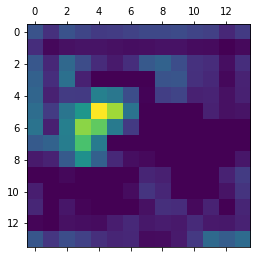

In [58]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
#Heatmap post-processing

we'll use OpenCV to generate an image that superimposes the original image on the heatmap we just obtained

In [61]:
import cv2

img = cv2.imread(img_path)                                                 

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))                

heatmap = np.uint8(255 * heatmap)                                          

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)                     

superimposed_img = heatmap * 0.4 + img                                     

cv2.imwrite('images/creative_commons_elephant_cam.jpg', superimposed_img)

True